# Installing LazyPredict

In [ ]:
pip install lazypredict

# Imports

In [2]:
import lazypredict 
from lazypredict import Supervised 
from lazypredict.Supervised import LazyRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn import datasets
from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10,5)

## Loading Data

In [3]:
data = load_boston()

X = data.data
y = data.target

X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=.33,random_state =12)

# Listing all different Regressors available 

In [4]:
print("ALL AVAILABLE REGRESSION MODELS:")
for i in range(42):
    print(i+1, lazypredict.Supervised.REGRESSORS[i][0])

ALL AVAILABLE REGRESSION MODELS:
1 AdaBoostRegressor
2 BaggingRegressor
3 BayesianRidge
4 DecisionTreeRegressor
5 DummyRegressor
6 ElasticNet
7 ElasticNetCV
8 ExtraTreeRegressor
9 ExtraTreesRegressor
10 GammaRegressor
11 GaussianProcessRegressor
12 GeneralizedLinearRegressor
13 GradientBoostingRegressor
14 HistGradientBoostingRegressor
15 HuberRegressor
16 KNeighborsRegressor
17 KernelRidge
18 Lars
19 LarsCV
20 Lasso
21 LassoCV
22 LassoLars
23 LassoLarsCV
24 LassoLarsIC
25 LinearRegression
26 LinearSVR
27 MLPRegressor
28 NuSVR
29 OrthogonalMatchingPursuit
30 OrthogonalMatchingPursuitCV
31 PassiveAggressiveRegressor
32 PoissonRegressor
33 RANSACRegressor
34 RandomForestRegressor
35 Ridge
36 RidgeCV
37 SGDRegressor
38 SVR
39 TransformedTargetRegressor
40 TweedieRegressor
41 XGBRegressor
42 LGBMRegressor


# Training 

In [5]:
%%time
reg = LazyRegressor(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     random_state=12,
                     regressors='all',
                    )
models,predictions = reg.fit(X_train, X_valid, y_train, y_valid)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 14.41it/s]

Wall time: 2.93 s


# Results

In [6]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.87,0.88,3.18,0.15
GradientBoostingRegressor,0.85,0.86,3.42,0.08
RandomForestRegressor,0.84,0.85,3.49,0.20
XGBRegressor,0.83,0.85,3.57,0.97
BaggingRegressor,0.83,0.84,3.65,0.03
LGBMRegressor,0.82,0.83,3.73,0.05
HistGradientBoostingRegressor,0.80,0.82,3.87,0.45
AdaBoostRegressor,0.80,0.81,3.95,0.08
PoissonRegressor,0.76,0.78,4.25,0.01


# TOP 5 Regressors

In [7]:
models.head(5)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.87,0.88,3.18,0.15
GradientBoostingRegressor,0.85,0.86,3.42,0.08
RandomForestRegressor,0.84,0.85,3.49,0.20
XGBRegressor,0.83,0.85,3.57,0.97
BaggingRegressor,0.83,0.84,3.65,0.03


# Visualizing Results

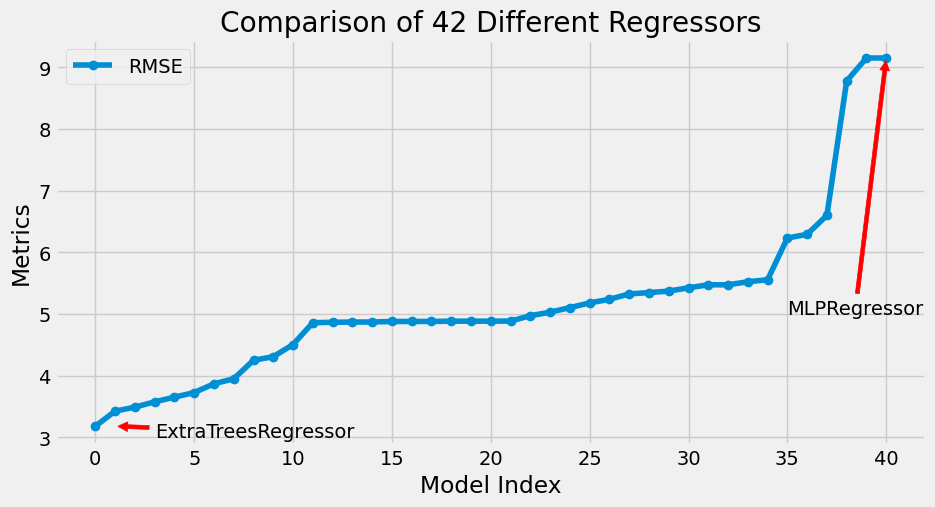

In [8]:
idx = [i for i in range(41)]
plt.plot(idx, models["RMSE"][:41]  , label = "RMSE" , marker = 'o' )


plt.annotate(models.index[0] , 
             (1,models["RMSE"][0]) , 
             xytext  =(3,3),
             arrowprops = dict(
                               arrowstyle = "simple",
                 color = "red"
                              ))

plt.annotate(models.index[26] , 
             (40 , models["RMSE"][40]) ,
             xytext  =(35,5),
             arrowprops = dict(
                               arrowstyle = "simple",
                                 color = "red"

                              ))
plt.xlabel("Model Index")
plt.ylabel("Metrics")
plt.title("Comparison of 42 Different Regressors")
plt.legend()
plt.show()

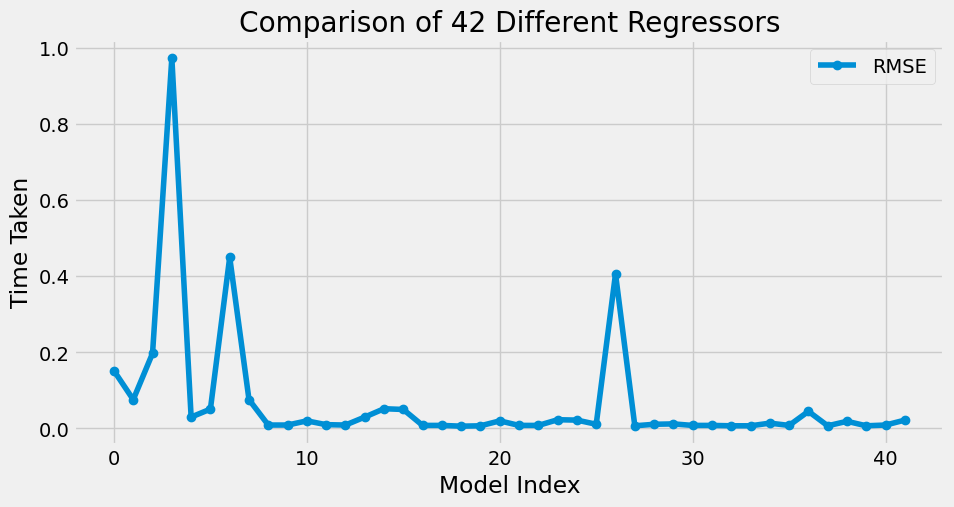

In [9]:
idx = [i for i in range(42)]
plt.plot(idx, models["Time Taken"] , label = "RMSE" ,marker = "o" )
plt.xlabel("Model Index")
plt.ylabel("Time Taken")
plt.title("Comparison of 42 Different Regressors")
plt.legend()
plt.show()